In [598]:
import pandas as pd
from src import analysis_utils as utils
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
%load_ext autoreload
%autoreload
import time
import math

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [105]:
def readSimData(path):
    df = pandas.read_csv(path,sep=" ")
    df.columns=["time","rxn","x","y","z","reactantA","reactantB","productA","productB"]
    return df

def avg(col):
    tot=0
    for i in range(len(col)):
        tot+=(sum(col[i])/len(col[i]))
    return tot/len(col)
    #The average is still 47, but now there's 2 populations: those that are interacting very often with the ribosome, and those are interacting very infrequently.
def avgArr(col):
    avgArr=list()
    stdArr=list()
    for arr_i in range(len(col)):
        avgArr.append(np.average(col[arr_i]))
    return avgArr

def median(col):
    tot=0
    for i in range(len(col)):
       tot+=(np.median(np.array(col[i])))
    return tot/len(col)



In [5]:
#Experiment 12
df12=readSimData("./data/AM4S_expt12_47tRNAEfTuEfTu7ribosome.xls")
rib12,timeavg12=utils.countRibosomeCollisions(df=df12,tRNAid=1,ribosomeIDList=list(range(48,55)))
col12=utils.countIncorrectRibosomeCollisions(df12, tRNAidList=list(range(1,20)),ribosomeID=51)
print(len(col12))

2
19


46.12532815883022
31.7368421053


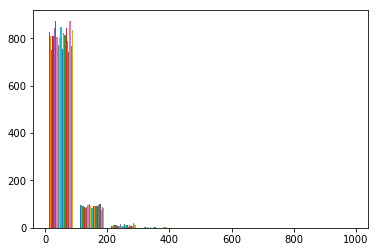

In [23]:
plt.hist(col12,bins=10,range=(1,1000)) #expt 5
print(avg(col12))
print(median(col12))
#plt.plot(col[0][0:1000])
#People have talked about the average hit time, but as far as I've seen, nobody has shown the power law distribution of sample times.
#If I show with average TIMESTEPS btwn correct collision, maybe this will turn gaussian?
#Why is median only 31 instead of 46?

In [7]:
#Experiment 11: 6tRNA
df11=readSimData("./data/AM4S_expt11_47tRNAEfTuEfTu7ribosomev2.xls")
rib11,timeavg11=utils.countRibosomeCollisions(df=df11,tRNAid=1,ribosomeIDList=list(range(48,55)))
col11=utils.countIncorrectRibosomeCollisions(df11, tRNAidList=list(range(1,20)),ribosomeID=51)

#print(col)

2


NameError: name 'col' is not defined

19
46.76607817577013
9.0


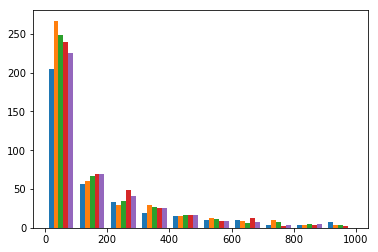

In [72]:
print(len(col11))
plt.hist(col11[0:5],bins=10,range=(1,1000)) #expt 11
print(avg(col11))
print(median(np.nonzero(col11)))
#plt.plot(col[0][0:1000])

In [25]:
#Experiment 13: 6tRNA
df13=readSimData("./data/AM4S_expt13_47tRNAEfTuEfTu7ribosome.xls")
rib13,timeavg11=utils.countRibosomeCollisions(df=df13,tRNAid=1,ribosomeIDList=list(range(48,55)))
col13=utils.countIncorrectRibosomeCollisions(df13, tRNAidList=list(range(1,20)),ribosomeID=51)

#print(col)

2


In [27]:
col13_48=utils.countIncorrectRibosomeCollisions(df13, tRNAidList=list(range(1,20)),ribosomeID=48)


19
46.27639709627217
9.0


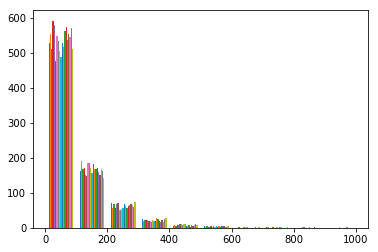

In [26]:
print(len(col13))
plt.hist(col13,bins=10,range=(1,1000)) #expt 11
print(avg(col13))
print(median(np.nonzero(col13)))
#plt.plot(col[0][0:1000])

46.21832657534107


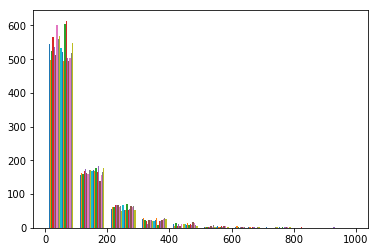

In [31]:
plt.hist(col13_48,bins=10,range=(1,1000)) #expt 11
print(avg(col13_48))


(array([ 573.,  170.,   61.,   19.,    3.,    5.,    0.,    0.,    1.,    0.]),
 array([    1. ,   100.9,   200.8,   300.7,   400.6,   500.5,   600.4,
          700.3,   800.2,   900.1,  1000. ]),
 <a list of 10 Patch objects>)

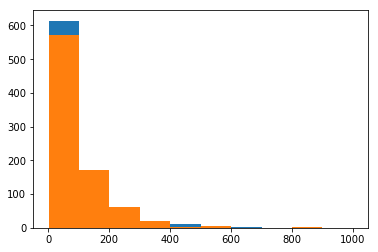

In [43]:
plt.hist(col13_48[13],bins=10,range=(1,1000)) #expt 11
plt.hist(col13[13],bins=10,range=(1,1000)) #expt 11


19

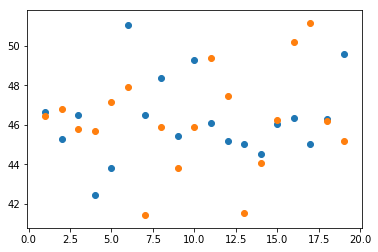

In [76]:
len(col13[1])
plt.scatter(range(1,20),avgArr(col13))
plt.scatter(range(1,20),avgArr(col13_48))


19
19


{'bodies': [<matplotlib.collections.PolyCollection at 0x11dc72ba8>,
 'cbars': <matplotlib.collections.LineCollection at 0x11e18e278>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x11dc72e48>,
 'cmins': <matplotlib.collections.LineCollection at 0x11e18ec18>}

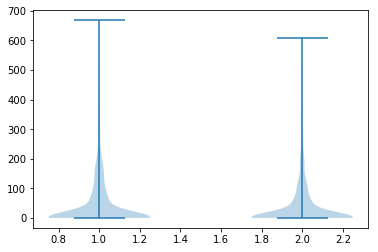

In [103]:
print(len(list(range(1,20))))
print(len(col13))
pos = [1, 2]
data=[col13[6],col13_48[6]]
plt.violinplot(data,pos)

In [207]:
#Experiment 13: 6tRNA

df13=readSimData("./data/AM4S_expt13_47tRNAEfTuEfTu7ribosome.xls")
start_time = time.time()
col13=utils.countIncorrectRibosomeCollisions(df13, tRNAidList=list(range(1,3)),ribosomeidList=list(range(48,55)))
print("--- %s seconds ---" % (time.time() - start_time))
len(col13)

48
49
50
51
52
53
54
--- 583.3095009326935 seconds ---


7

In [ ]:
plt.violinplot(data,pos)

In [ ]:
#Create method for seeing how 1 tRNA did with all ribosomes (just expand my methods to include ribosome data)

#I expect a longer tail for experiment 11 w/ crowding.Check to see if there's a split population 
#(i.e. 1 tRNA that's mostly in 1 ribosome w/ 0 others; and that's very few intrxns w/ another ribosome)

#redo this analysis with a 0.5ms delay

#Try by keeping ribosomes close to each other and encoding same thing

#Set up the 0.5ms delay such that that the delay occurs for 1 ribosome with some of the tRNAs
#and another ribosome for the other tRNAs maybe?

#OR, set it up s.t. 1 ribosome causes a few of the tRNA to block the ribosome for 0.5ms,
#but no other ribosome does.

#ACTUALLY, what if gemiante reactions are part of the proofreading process? i.e.,
#the system is so crowded that a correct tRNA is likely to keep getting pushed back
#in if it sneaks out. But then that would suggest that correct tRNAs are somehow
#enriched by ribosomes correctly...maybe by binding to something or getting trapped
# or being passed on by a near polysome; else the wrong tRNA would keep getting shoved
#back in as well. OR, the wrong tRNA gets shoved off some other way.

#Could there be a way for ribosome to kick the tRNA back to next ribosome on the
#mRNA chain once its done with the tRNA?

#ok now i remember; the trick was, let the ribosome not acept the correct tRNA after it's 
#bound correctly once for ~0.5ms (i.e. maybe the min. time it takes for the next ribosome on 
#the polysome to arrive near this location). Then see if that leads to more correct binding
#(fewer incorrect bindings; don't turn off reactions for the other 46 tRNAs so can directly
#compare binding takes time vs. without this 0.5 ms thing. 
#Make the 0.5ms as short as needed to still see an effect

#Maybe it won't be bimodal at the 100ms scale, but if I look at a shorter scale,
#like 1ms or 10ms, not all tRNA will be able to sample all ribosome....make plot
#w/ this idea

In [138]:
#I need a positive control where I'd definitely see a difference in sampling
#Try supercrowded situation?
#Also, normalize counts maybe?
#Actually, as negative control, I can just do the same experiment but without
#any bounce btwn tRNAs/other molecules; only count reactions btwn ribosomes and
#tRNAs

#CREATE TIME DYNAMICS; i.e., how 1 tRNA samples all 6 ribosomes (or even just 2 different ribosomes) over time
#This will help us quantify caging dynamics. And do this as above w/ controls.
#Run these 3 setups for a long time; then can calculate avg intrxns as i've done
#above across time (same as seeing distrib shift w/ time but w/ a number metric)

1

In [ ]:
col13_fast=utils.countIncorrectRibosomeCollisionsFast(df13, list(range(1,3)),list(range(48,55)))


In [599]:
#df1a2=df1a2.sort_values(['time'], ascending=[True])
#print(df1a2.iloc[df1a2.shape[0]-1]['time'])
#df1a2=df1a2.sort_values(['time'], ascending=[True])
#a=df1a2.groupby(pd.cut(df1a2["time"],np.arange(0,1.0001,0.1)))
#magroups = [a.get_group(x) for x in a.groups]
#mapgroups = [name for name, unused_df in a]
#b=[]
df12=readSimData("./data/AM4S_expt12_47tRNAEfTuEfTu7ribosome.xls")
rib12,timeavg12=utils.countRibosomeCollisions(df=df12,tRNAid=1,ribosomeIDList=list(range(48,55)))
col12=utils.countIncorrectRibosomeCollisions(df12, tRNA_IDList=list(range(1,5)),ribosome_IDList=list(range(48,51)))

a=utils.timeSplitter(df12,time_interval=0.2,scale="log")


Reached tRNA  2 . Completed counting collisions between tRNA  1  and ribosomes  [48, 49, 50, 51, 52, 53, 54]
Initial tRNA x ribosome x collisionGapNumber has shape: (4, 3, 0)
Currently processing ribosome # 0
Currently processing ribosome # 1
Currently processing ribosome # 2


2
Initial tRNA x ribosome x collisionGapNumber has shape: (4, 3, 0)
Currently processing ribosome # 0
Currently processing ribosome # 1
Currently processing ribosome # 2


([array([ 854.,   83.,    8.,    2.,    0.,    0.,    0.,    0.,    0.,    0.]),
  array([ 832.,   84.,    7.,    0.,    0.,    0.,    0.,    0.,    0.,    0.]),
  array([ 766.,  101.,    7.,    1.,    0.,    0.,    0.,    0.,    0.,    0.])],
 array([    1. ,   100.9,   200.8,   300.7,   400.6,   500.5,   600.4,
          700.3,   800.2,   900.1,  1000. ]),
 <a list of 3 Lists of Patches objects>)

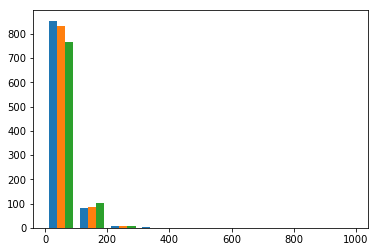

In [600]:
print(len(a))
j=utils.countIncorrectRibosomeCollisions(a[1],tRNA_IDList=list(range(1,5)),ribosome_IDList=list(range(48,51)))
plt.hist(j[0],bins=10,range=(1,1000)) #expt 11

In [ ]:
#Create new notebook and compare above methods w/ positive control (infinite crowding/stucj), negative control(molecules can go thru each other), and experimental params.

In [ ]:
#Module for analysis of number of wrong collisions before correct tRNA reaches ribosome 1.4 times
#Produces graph of distribution of number of collisions in between two correct events
#Need to check to see how far the poisson (power law?) distribution is for caged events vs. free diffusing/mixing events
#to identify anomalies/spatial effects other than just being rare events being sampled.
#or we find out that the distribution is same for each ribosome, just spends less time near the ribosome.
#Fluitt uses "average", but really we have a poisson sampling rate where "avg" less meaningful
#Rewrite this code to just do calculation of riboosme&tRNA count w/ 1 pass of df